In [1]:
import psycopg2 as pg
import getpass
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
user = input("Username: ")
password = getpass.getpass("Password: ")
conn = pg.connect(dbname='csci403', user=user, password=password, host='codd.mines.edu', port='5433')
del user
del password
cur = conn.cursor()

In [3]:
query = """SELECT tsla.day, tsla.price, btc.price FROM tsla, btc WHERE tsla.day = btc.day;"""
cur.execute(query)
sql_table = cur.fetchall()
df = pd.DataFrame(sql_table, columns=['day', 'tsla_price', 'btc_price'])
df

,day,tsla_price,btc_price
0,2010-06-29,19.00,0.0
1,2010-06-30,25.79,0.0
2,2010-07-01,25.00,0.0
3,2010-07-02,23.00,0.0
4,2010-07-06,20.00,0.0
...,...,...,...
1907,2018-01-25,348.27,11214.4
1908,2018-01-26,341.50,10969.8
1909,2018-01-29,339.85,11212.7
1910,2018-01-30,345.14,10184.1


In [4]:
np.corrcoef(df['tsla_price'], df['btc_price'])

array([[1.       , 0.4936166],
       [0.4936166, 1.       ]])

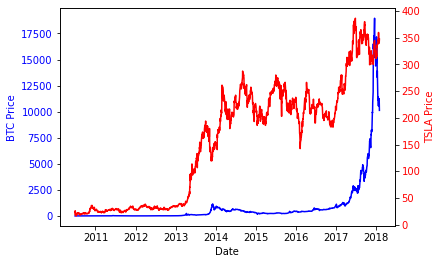

In [5]:
fig, ax1 = plt.subplots()
ax1.plot(df['day'], df['btc_price'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(df['day'], df['tsla_price'], color='red')
ax2.set_ylabel('TSLA Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

In [6]:
query = """SELECT * FROM btc;"""
cur.execute(query)
sql_table = cur.fetchall()
df_btc = pd.DataFrame(sql_table, columns=['day', 'price', 'total_btc', 'hash_rate', 'difficulty', 'output_volume'])
df_btc

,day,price,total_btc,hash_rate,difficulty,output_volume
0,2010-02-17,0.0,2043200.0,2.920000e-05,2.527740e+00,65173.10
1,2010-02-18,0.0,2054650.0,2.880000e-05,2.527740e+00,18911.70
2,2010-02-19,0.0,2063600.0,2.250000e-05,2.527740e+00,9749.98
3,2010-02-20,0.0,2074700.0,2.790000e-05,2.527740e+00,11150.00
4,2010-02-21,0.0,2085400.0,2.690000e-05,2.527740e+00,12266.80
...,...,...,...,...,...,...
2901,2018-01-27,11524.8,16830300.0,2.031570e+07,2.600000e+12,1363300.00
2902,2018-01-28,11765.7,16832300.0,2.044510e+07,2.600000e+12,3128910.00
2903,2018-01-29,11212.7,16834100.0,1.915120e+07,2.600000e+12,1941050.00
2904,2018-01-30,10184.1,16836200.0,2.160970e+07,2.600000e+12,2359670.00


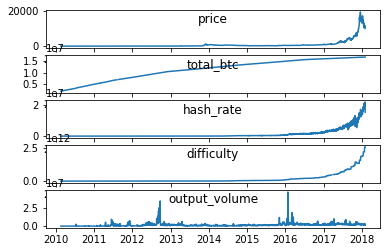

In [7]:
fig, ax = plt.subplots(5)
for i, name in enumerate(df_btc.columns[1:]):
    ax[i].plot(df_btc['day'], df_btc[name])
    ax[i].set_title(name, y=0.5)

In [8]:
query = """SELECT * FROM pollution;"""
cur.execute(query)
sql_table_pollution = cur.fetchall()
df_pollution = pd.DataFrame(sql_table_pollution, columns=['country_name', 'country_code', '2010', '2011', '2012', '2013','2014','2015','2016','2017'])
df_pollution

,country_name,country_code,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,AFG,65.245592,66.835727,66.023174,61.366745,59.010330,61.252656,56.287047,56.910808
1,Angola,AGO,33.787247,33.104195,33.415495,34.663923,32.974025,32.729873,31.785389,32.388505
2,Albania,ALB,21.277828,22.772537,20.578259,19.938517,18.883955,19.512540,18.189934,18.200603
3,Andorra,AND,12.807197,13.273506,12.407053,11.813673,10.830418,11.462178,10.255834,10.307621
4,Arab World,ARB,53.787001,52.652279,53.297270,54.053822,52.583603,60.406813,58.764905,58.689259
...,...,...,...,...,...,...,...,...,...,...
235,Samoa,WSM,14.288094,14.693096,13.627882,13.382522,12.643560,12.321796,11.366298,11.548027
236,"Yemen, Rep.",YEM,45.979470,50.835291,51.434454,52.998443,48.338653,54.260287,50.127626,50.456007
237,South Africa,ZAF,27.138587,26.557873,26.577087,26.729262,26.722212,26.112972,25.140416,25.102205
238,Zambia,ZMB,28.836379,28.987117,29.742040,29.112221,28.493252,28.375452,27.355674,27.438035


In [9]:
query = """SELECT EXTRACT(YEAR FROM day), AVG(price) FROM btc GROUP BY EXTRACT(YEAR FROM day) ORDER BY EXTRACT(YEAR FROM day);"""
cur.execute(query)

btc_avg_price = cur.fetchall()
df_btc_avg_price = pd.DataFrame(btc_avg_price, columns=['year','avg'])

df_btc_avg_price

,year,avg
0,2010.0,0.072337
1,2011.0,6.050227
2,2012.0,8.465060
3,2013.0,189.546581
4,2014.0,526.021945
5,2015.0,272.361069
6,2016.0,567.278348
7,2017.0,4001.162575
8,2018.0,13047.251229


[[1.         0.29696076]
 [0.29696076 1.        ]]


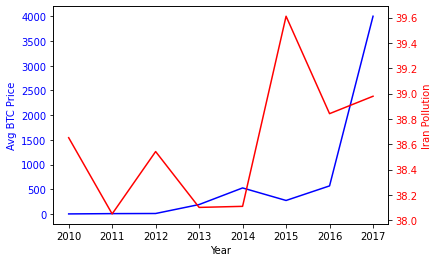

In [10]:
iran = df_pollution[df_pollution['country_code']=='IRN']
iran = iran.drop(columns=['country_name', 'country_code'])
iran = np.reshape(iran.to_numpy(), -1)
btc_avg = df_btc_avg_price['avg'][:-1]

fig, ax1 = plt.subplots()
ax1.plot(range(2010,2018), btc_avg, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Avg BTC Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(range(2010,2018), iran, color='red')
ax2.set_ylabel('Iran Pollution', color='red')
ax2.tick_params(axis='y', labelcolor='red')

print(np.corrcoef(btc_avg, iran))

In [11]:
# Generating the world map
from pycountry_convert import country_name_to_country_alpha3
from geopy.geocoders import Nominatim
 
geolocator = Nominatim(user_agent='pollution-map')
df_coords = pd.DataFrame({'country_name':[], 'latitude':[], 'longitude':[]})

for country in df_pollution['country_name']:
    try:
        a2_code = country_name_to_country_alpha3(country)
        loc = geolocator.geocode(country)
        df_coords.loc[len(df_coords.index)] = [country, loc.latitude, loc.longitude]
    except:
        print('Couldn\'t find country', country)

df_coords

Couldn't find country Arab World
Couldn't find country Bahamas, The
Couldn't find country Central Europe and the Baltics
Couldn't find country Cote d'Ivoire
Couldn't find country Congo, Dem. Rep.
Couldn't find country Congo, Rep.
Couldn't find country Caribbean small states
Couldn't find country East Asia & Pacific (excluding high income)
Couldn't find country Early-demographic dividend
Couldn't find country East Asia & Pacific
Couldn't find country Europe & Central Asia (excluding high income)
Couldn't find country Europe & Central Asia
Couldn't find country Egypt, Arab Rep.
Couldn't find country Euro area
Couldn't find country European Union
Couldn't find country Fragile and conflict affected situations
Couldn't find country Micronesia, Fed. Sts.
Couldn't find country Gambia, The
Couldn't find country High income
Couldn't find country Heavily indebted poor countries (HIPC)
Couldn't find country IBRD only
Couldn't find country IDA & IBRD total
Couldn't find country IDA total
Couldn't 

,country_name,latitude,longitude
0,Afghanistan,33.768006,66.238514
1,Angola,-11.877577,17.569124
2,Albania,41.000028,19.999962
3,Andorra,42.540717,1.573203
4,United Arab Emirates,24.000249,53.999483
...,...,...,...
173,Vanuatu,-16.525507,168.106915
174,Samoa,-13.769390,-172.120051
175,South Africa,-28.816624,24.991639
176,Zambia,-14.518912,27.558988


In [12]:
import folium
from folium.plugins import MarkerCluster

world_map = folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(df_coords)):
    lat = df_coords.iloc[i]['latitude']
    lon = df_coords.iloc[i]['longitude']

    pollution_row = df_pollution[df_pollution['country_name'] == df_coords.iloc[i]['country_name']]
    popup_text = """Country : {}<br>2017 Pollution : {}<br>"""
    popup_text = popup_text.format(df_coords.iloc[i]['country_name'], int(pollution_row['2017']))

    folium.CircleMarker(location=[lat, lon], radius=5, popup=popup_text, fill=True).add_to(marker_cluster)

world_map